In [1]:
import scipy
from scipy import stats
import scipy.integrate as spi
import numpy as np
import pylab as pl
import pandas as pd
import math
import xlrd
import sys
import time

%matplotlib inline

In [2]:
filename = 'coronaData.xlsx'
book = xlrd.open_workbook(filename)
print('Source file: ' + sys.path[0] + filename + ' loaded!')

#Extraction
nsheets = book.nsheets

sheet_names = book.sheet_names()
sheets = {}

for sheet_name in sheet_names:    
    nrows = book.sheet_by_name(sheet_name).nrows
    current_header = book.sheet_by_name(sheet_name).row_values(0) 
    current_data = [book.sheet_by_name(sheet_name).row_values(i) for i in range(1, nrows)]
    sheets[sheet_name] = pd.DataFrame(current_data, columns = current_header)   #DataFrame Construction
#Feedback
print('Data Extracted!')

Source file: I:\Chuan\Documents\GitHub\Research\SEIRcoronaData.xlsx loaded!
Data Extracted!


In [3]:
sheet_names

['Italy',
 'Iran',
 'Switzerland',
 'UK',
 'SouthKorea',
 'France',
 'Germany',
 'Spain',
 'US',
 'China']

In [4]:
chosen_country = 'China'
population = 7 * math.pow(10,6)
infected_initial = 548
removed_initial = 45

start_count_day = 0

# Population
# China(Wuhan): 7e6, Italy: 49e6, Germany 81e6, Spain: 47e6, France: 64e6, US: 327e6, SouthKorea: 506e6

In [5]:
sheets[chosen_country]

,China,infected,recovered,death
0,43852,548.0,28.0,17.0
1,43853,643.0,30.0,18.0
2,43854,920.0,36.0,26.0
3,43855,1406.0,39.0,42.0
4,43856,2075.0,49.0,56.0
5,43857,2877.0,58.0,82.0
6,43858,5509.0,101.0,131.0
7,43859,6087.0,120.0,133.0
8,43860,8141.0,135.0,171.0
9,43861,9802.0,214.0,213.0


In [6]:
removed_observed = sheets[chosen_country]['recovered'][start_count_day:] + sheets[chosen_country]['death'][start_count_day:]
infected_observed = sheets[chosen_country]['infected'][start_count_day:] - removed_observed

In [7]:
len(removed_observed)

58

Text(0, 0.5, 'Infectious and Recovereds')

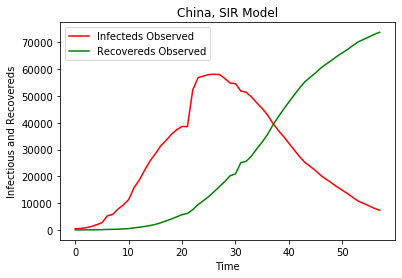

In [8]:
#Ploting
pl.plot(infected_observed, '-r', label='Infecteds Observed')
pl.plot(removed_observed, '-g', label='Recovereds Observed')

pl.legend(loc=0)
pl.title(chosen_country+', SIR Model')
pl.xlabel('Time')
pl.ylabel('Infectious and Recovereds')

In [9]:
infected_observed

0       503.0
1       595.0
2       858.0
3      1325.0
4      1970.0
5      2737.0
6      5277.0
7      5834.0
8      7835.0
9      9375.0
10    11357.0
11    15806.0
12    18677.0
13    22373.0
14    25762.0
15    28477.0
16    31393.0
17    33413.0
18    35705.0
19    37424.0
20    38638.0
21    38560.0
22    52309.0
23    56860.0
24    57452.0
25    57992.0
26    58108.0
27    58002.0
28    56541.0
29    54825.0
30    54608.0
31    51859.0
32    51390.0
33    49631.0
34    47413.0
35    45365.0
36    42924.0
37    39809.0
38    37199.0
39    34898.0
40    32368.0
41    29864.0
42    27402.0
43    25230.0
44    23702.0
45    22159.0
46    20335.0
47    18933.0
48    17567.0
49    16116.0
50    14859.0
51    13569.0
52    12124.0
53    10783.0
54     9906.0
55     9030.0
56     8106.0
57     7372.0
dtype: float64

## Iteratible SIR Model

In [10]:
t_start = 0.0
t_end = len(removed_observed) + 1       # Transmit Time

N = population
R0 = removed_initial
I0 = infected_initial      # Initial Number of Infectious
S0 = N - I0 - R0    # Initial Number of Susceptible

INPUT = (S0, I0, R0)

def model_SIR(INP,t):  
    Y = np.zeros((3))
    V = INP
    Y[0] = - beta * V[0] * V[1]/N                    # Y[0] is dS(t)/dt, V[0] is S(t)
    Y[1] = beta * V[0] * V[1]/N - gamma * V[1]       # Y[1] is dI(t)/dt, V[1] is I(t)
    Y[2] = gamma * V[1]                            # Y[2] is dR(t)/dt.
    return Y   # For odeint

t_range = np.arange(t_start, t_end)

### Start Interation

In [11]:
start = time.time()

minimum_infected = math.pow(10,10)
minimum_removed = math.pow(10,10)

for gamma in np.arange(0.01, 10.0, 0.01):
    for beta in np.arange(0.01, 10.0, 0.01):
        RES = spi.odeint(model_SIR, INPUT, t_range) 
        
        # Goodness Test of Fitness
        
        #print(RES)
        
        fitness_infected = stats.chisquare(infected_observed, RES[1:, 1])
        fitness_removed = stats.chisquare(removed_observed, RES[1:, 2])
        
       
        if abs(fitness_infected[0]) < 10000 and abs(fitness_removed[0]) < 10000:
            print('\nbeta=', beta, '  gamma=', gamma, fitness_infected, fitness_removed)
        
        
        #print('beta=', beta, '  gamma=', gamma, fitness_infected, fitness_removed)
            
        if abs(fitness_infected[0]) < minimum_infected and abs(fitness_removed[0]) < minimum_removed:
            minimum_infected = fitness_infected[0]
            minimum_removed = fitness_removed[0]
            beta_mini = beta
            gamma_mini = gamma
            
end = time.time()
duration = end - start
            
print('\nThe minimum_infected Z is ', minimum_infected)
print('The minimum_removed Z is ', minimum_removed)
print('when beta is ', beta_mini)
print('when gamma is ', gamma_mini)

print('Time: ', duration)


The minimum_infected Z is  6127431.291246891
The minimum_removed Z is  513279.89775528293
when beta is  0.18000000000000002
when gamma is  0.06999999999999999
Time:  1841.3673605918884


## SIR Validation

In [12]:
beta = beta_mini
gamma = gamma_mini

t_start = 0.0
t_end = 200      # Transmit Time

N = population
R0 = removed_initial
I0 = infected_initial  # Initial Number of Infectious
S0 = N - I0 - R0    # Initial Number of Susceptible

INPUT = (S0, I0, R0)

In [13]:
def model_SIR(INP,t):  
    Y = np.zeros((3))
    V = INP
    Y[0] = - beta * V[0] * V[1]/N                    # Y[0] is dS(t)/dt, V[0] is S(t)
    Y[1] = beta * V[0] * V[1]/N - gamma * V[1]       # Y[1] is dI(t)/dt, V[1] is I(t)
    Y[2] = gamma * V[1]                            # Y[2] is dR(t)/dt.
    return Y   # For odeint


In [14]:
def calculate_maximum(RES):
    infected_maximum = 0
    infected_delta_maximum = 0
    day = 0
    infected_yesterday = 0
    
    for daily_value in RES:
        if daily_value[1] > infected_maximum:
            infected_maximum = daily_value[1]
            day_maximum = day
            
        if daily_value[1]-infected_yesterday > infected_delta_maximum:
            infected_delta_maximum = daily_value[1]-infected_yesterday
            day_inflection = day
            
        day = day + 1
        infected_yesterday = daily_value[1]
        
    return infected_maximum, day_maximum, infected_delta_maximum, day_inflection        

In [15]:
t_range = np.arange(t_start, t_end)

RES = spi.odeint(model_SIR, INPUT, t_range)   # INPUT is the first parameter of func diff_eqs
                                             # t_range is the second parameter of func diff_eqs

In [16]:
peak_infected, peak_day, peak_new, inflection_day = calculate_maximum(RES)

print('Peak Infected: ', f"{int(peak_infected):,d}")
print('Peak Day: ', peak_day)
print('New Case Increase Mostly: ',  f"{int(peak_new):,d}")
print('Inflection Day: ', inflection_day)


Peak Infected:  1,706,806
Peak Day:  90
New Case Increase Mostly:  63,435
Inflection Day:  75


Text(0, 0.5, 'Infectious and Recovereds')

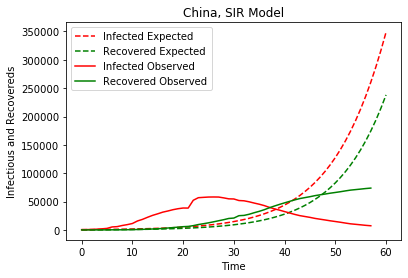

In [17]:
#Ploting
day = start_count_day + len(removed_observed) + 3
pl.plot(RES[:day,1], '--r', label='Infected Expected')
pl.plot(RES[:day,2], '--g', label='Recovered Expected')
pl.plot(infected_observed, '-r', label='Infected Observed')
pl.plot(removed_observed, '-g', label='Recovered Observed')

pl.legend(loc=0)
pl.title(chosen_country + ', SIR Model')
pl.xlabel('Time')
pl.ylabel('Infectious and Recovereds')

Text(0, 0.5, 'Infectious and Recovereds')

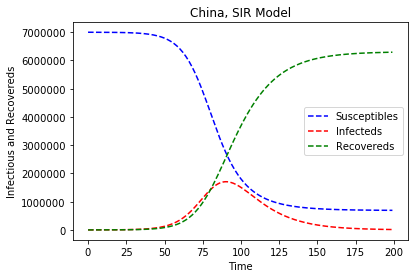

In [18]:
#Ploting
pl.plot(RES[:,0], '--b', label='Susceptibles')
pl.plot(RES[:,1], '--r', label='Infecteds')
pl.plot(RES[:,2], '--g', label='Recovereds')

pl.legend(loc=0)
pl.title(chosen_country + ', SIR Model')
pl.xlabel('Time')
pl.ylabel('Infectious and Recovereds')